In [1]:
import cococo.layouts as layouts
import cococo.utils_routing as utils
import cococo.hill_climber as hill_climber
import plotting

In [2]:
layout_type = "pair"
m = 3
n = 4
factories =[
 (12, 7),
 (14, -1),
 (5, -1),
 (3, 7),]
remove_edges = False
g, data_qubit_locs, factory_ring = layouts.gen_layout_scalable(layout_type, m, n, factories, remove_edges)

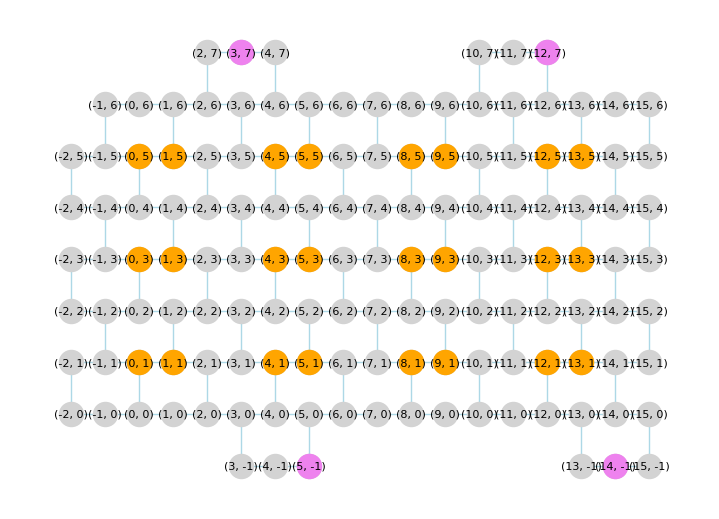

In [3]:
size = (7,5)
plotting.plot_lattice(
    g, size=size, data_qubit_locs=data_qubit_locs, factory_locs=factories
)

In [4]:
pairs = [
    (22, 6),
    (11, 2),
    1,
    (14, 3),
    12,
    (18, 19),
    0,
    (7, 20),
    (8, 21),
    9,
    (17, 13),
    23,
    (10, 15),
    5,
    4,
    16
]

In [5]:
layout = {}
for i, j in zip(range(len(data_qubit_locs)), data_qubit_locs):
    layout.update({i: (int(j[0]), int(j[1]))})

In [6]:
custom_layout = [data_qubit_locs, g]

hc = hill_climber.HillClimbing(
    max_restarts=10,
    max_iterations=50,
    circuit=pairs,
    metric="exact",
    t=1,
    custom_layout=custom_layout,
    use_dag = True,
    valid_path = "cc",
    possible_factory_positions=factories,
    num_factories=len(factories),
    optimize_factories=False,
    
)

parallel = True
processes = 8 #depending on your hardware
prefix = "./" #adapt the path depending on where you want to have stored the output
suffix = "test_hc"
best_solution, best_score, best_rep, score_history = hc.run(prefix, suffix, parallel, processes)
print(f"Best solution: {best_solution}")
print(f"Best score: {best_score}")
print(f"To which repetition of the random restarts does the best score belong? {best_rep}")

Hill Climbing Restarts...:   0%|          | 0/10 [00:00<?, ?it/s]


TypeError: unhashable type: 'list'

In [7]:
terminal_pairs = layouts.translate_layout_circuit(pairs, layout) #let's stick to the simple layout

In [ ]:
router = utils.BasicRouter(g, data_qubit_locs, factories, valid_path = "cc", t=8, metric = "exact", use_dag = True)
layers = router.split_layer_terminal_pairs(terminal_pairs)
vdp_layers, _ = router.find_total_vdp_layers_dyn(layers, data_qubit_locs, router.factory_times, layout, testing = True)

KeyError: (1, 1)

=====layer = 0====
<class 'dict'>


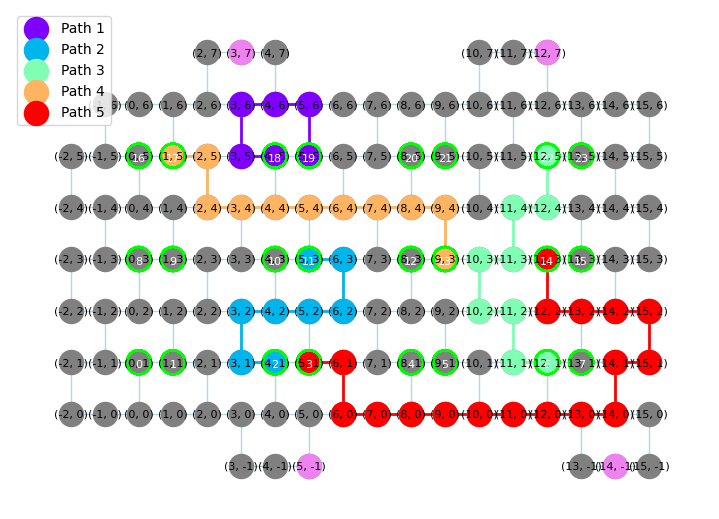

=====layer = 1====
<class 'dict'>


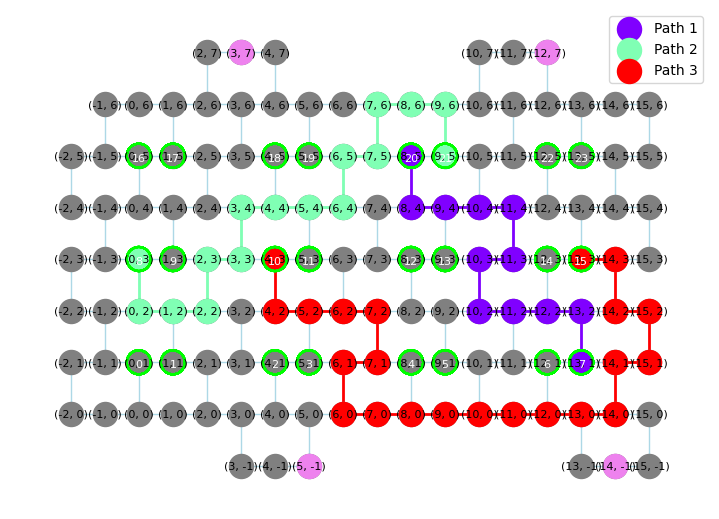

=====layer = 2====
<class 'dict'>
=====layer = 3====
<class 'dict'>
=====layer = 4====
<class 'dict'>
=====layer = 5====
<class 'dict'>
=====layer = 6====
<class 'dict'>
=====layer = 7====
<class 'dict'>
=====layer = 8====
<class 'dict'>


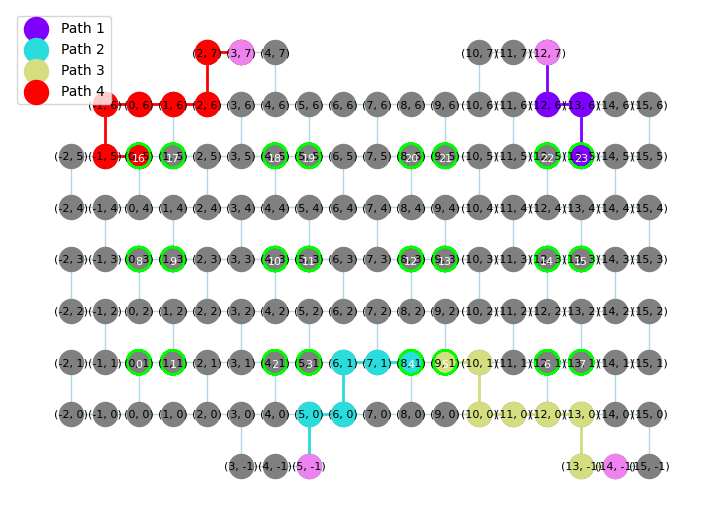

=====layer = 9====
<class 'dict'>
=====layer = 10====
<class 'dict'>
=====layer = 11====
<class 'dict'>
=====layer = 12====
<class 'dict'>
=====layer = 13====
<class 'dict'>
=====layer = 14====
<class 'dict'>
=====layer = 15====
<class 'dict'>
=====layer = 16====
<class 'dict'>
=====layer = 17====
<class 'dict'>


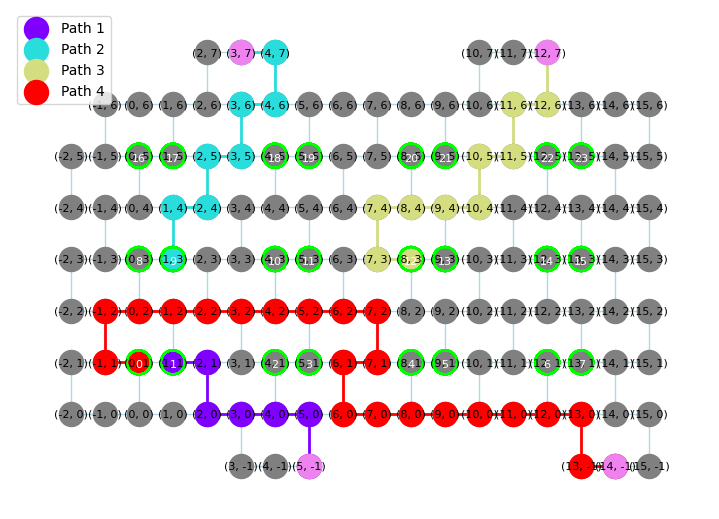

In [16]:
for i, vdp_dict in enumerate(vdp_layers):
    print(f"=====layer = {i}====")
    print(type(vdp_dict))
    if len(vdp_dict) != 0:
        plotting.plot_lattice_paths(g, vdp_dict, {}, layout = layout, factory_locs=factories, size=size)